Force tensorflow to use keras 2(legacy keras) instead of Keras 3. This is needed so that we can use TFBertModel, Legacy-style .h5 saving, tf.keras.model.fit, and Custom callbacks

These are stable only in Keras 2 mode for now.

In [ ]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
!pip uninstall -y tensorflow-text
!pip install tensorflow-text==2.19.0



Found existing installation: tensorflow-text 2.19.0
Uninstalling tensorflow-text-2.19.0:
  Successfully uninstalled tensorflow-text-2.19.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 67.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_text as text


In [ ]:
!pip uninstall -y transformers
!pip install transformers==4.41.2



Found existing installation: transformers 5.0.0
Uninstalling transformers-5.0.0:
  Successfully uninstalled transformers-5.0.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 137.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface_hub 1.4.0
    Uninstalling huggingface_hub-1.4.0:
      Successfully uninstalled huggingface_hub-1.4.0
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.2
    Uninstalling tokenizers-0.22.2:
      Successfully uninstalled tokenizers-0.22.2


In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:949: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train_raw1 = pd.read_csv('/content/drive/MyDrive/projects for github/BuzzFeed_fake_news_content.csv')
train_raw2 = pd.read_csv('/content/drive/MyDrive/projects for github/PolitiFact_fake_news_content.csv')
train_raw3 = pd.read_csv('/content/drive/MyDrive/projects for github/BuzzFeed_real_news_content.csv')
train_raw4 = pd.read_csv('/content/drive/MyDrive/projects for github/PolitiFact_real_news_content.csv')

In [ ]:
train_raw=pd.concat([train_raw1, train_raw2])
train_raw['Label']=1

In [ ]:
train_raw_real=pd.concat([train_raw3, train_raw4])
train_raw_real['Label']=0

In [ ]:
train_raw=pd.concat([train_raw, train_raw_real])
train_raw=train_raw.sample(frac=1)

In [ ]:
train_raw.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,Label
64,Real_49-Webpage,BREAKING: North Carolina Drops Anti-LGBT 'Bath...,North Carolina's governor has dropped a lawsui...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},1
5,Fake_14-Webpage,Obama Pushes One World Government,When President Obama spoke at the United Natio...,http://allenwestrepublic.com/2016/09/20/obama-...,http://allenwestrepublic.com/wp-content/upload...,NaN,http://allenwestrepublic.com,{'$date': 1474329600000},NaN,http://pbs.twimg.com/profile_images/6151636994...,http://allenwestrepublic.com/obama-pushes-one-...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",1
9,Real_107-Webpage,Glenn Beck shares buyer's remorse on Cruz endo...,Glenn Beck shares buyer's remorse on Cruz endo...,http://politi.co/2dmOPx8,http://v.politico.com/images/1155968404/201609...,"Jack Shafer,Nolan D,Shane Goldmacher",http://politi.co,{'$date': 1474902647000},NaN,http://v.politico.com/images/1155968404/201609...,http://www.politico.com/story/2016/09/glenn-be...,"{""description"": ""\u201cFor the very first time...",1
102,Real_83-Webpage,The Word Liberals are TERRIFIED Of – Eagle Rising,"Terrorism is terrorism, regardless of the sour...",http://eaglerising.com/36863/terrorism-the-wor...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474326152000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36863/terrorism-the-wor...,"{""description"": ""It is not hard to say 'terror...",1
56,Fake_60-Webpage,New Jersey Moves To Impeach Chris Christie Ove...,71k SHARES SHARE THIS STORY\n\nNew Jersey’s de...,http://occupydemocrats.com/2016/09/23/breaking...,http://occupydemocrats.com/wp-content/uploads/...,"Grant Stern,Brett Bose,Natalie Dickinson",http://occupydemocrats.com,{'$date': 1474588800000},https://www.youtube.com/embed/N5GRpJweZNU?feat...,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/23/breaking...,"{""generator"": ""Powered by Visual Composer - dr...",1


In [ ]:
train_raw.shape

(422, 13)

In [ ]:
train_raw=train_raw[train_raw.text.notnull()]
train_raw.shape

(422, 13)

In [ ]:
train_raw = train_raw[['title' ,'Label']]
train_raw.reset_index(inplace=True, drop=True)
train_raw.head()

,title,Label
0,BREAKING: North Carolina Drops Anti-LGBT 'Bath...,1
1,Obama Pushes One World Government,1
2,Glenn Beck shares buyer's remorse on Cruz endo...,1
3,The Word Liberals are TERRIFIED Of – Eagle Rising,1
4,New Jersey Moves To Impeach Chris Christie Ove...,1


In [ ]:
train = train_raw.copy()

In [ ]:
import re
def clean_txt(text):
    text = str(text)
    text = re.sub("'", "", text)
    text = re.sub("(\W)+", " ", text)
    return text.lower().strip()


<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:5: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-4028290293.py:5: SyntaxWarning: invalid escape sequence '\W'
  text = re.sub("(\W)+", " ", text)


In [ ]:
train['title']  = train.title.apply(clean_txt)
train.head()

,title,Label
0,breaking north carolina drops anti lgbt bathro...,1
1,obama pushes one world government,1
2,glenn beck shares buyers remorse on cruz endor...,1
3,the word liberals are terrified of eagle rising,1
4,new jersey moves to impeach chris christie ove...,1


In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2, random_state=35)


In [ ]:
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)

In [ ]:
val.shape, train.shape

((85, 2), (337, 2))

In [ ]:
def encode(texts, labels):
    encodings = tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=200,
        return_tensors="tf"
    )
    return encodings, tf.convert_to_tensor(labels.values)

train_encodings, train_labels = encode(train['title'], train['Label'])
val_encodings, val_labels = encode(train['title'], train['Label'])


In [ ]:
for key, value in train_encodings.items():
    print(key, value.shape)


input_ids (337, 200)
token_type_ids (337, 200)
attention_mask (337, 200)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": train_encodings["input_ids"],
        "attention_mask": train_encodings["attention_mask"],
    },
    train_labels
)).batch(32)


In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": val_encodings["input_ids"],
        "attention_mask": val_encodings["attention_mask"],
    },
    val_labels
)).batch(32)

A new technique is designed that utilizes pooled as well as sequential output of BERT. The sequential output of BERT is first averaged and then combined with the pooled output. Thus, information at sentence level and each word level is captured.

In [ ]:
input_ids = tf.keras.layers.Input(shape=(200,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.layers.Input(shape=(200,), dtype=tf.int32, name="attention_mask")

bert_outputs = bert_model(
    input_ids=input_ids,
    attention_mask=attention_mask
)
sequence_output = bert_outputs.last_hidden_state
cls_output = bert_outputs.last_hidden_state[:, 0, :]
avg_pool = tf.reduce_mean(sequence_output, axis=1)
concat = tf.keras.layers.Concatenate()([cls_output, avg_pool])
dense = tf.keras.layers.Dense(256, activation='relu')(concat)
drop = tf.keras.layers.Dropout(0.5)(dense)
final_output = tf.keras.layers.Dense(1, activation='sigmoid')(drop)

model = tf.keras.Model(
    inputs=[input_ids, attention_mask],
    outputs=final_output
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()




Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 200)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 200)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 200, 7                                     

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    patience=13,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_binary_accuracy',
    factor=0.22,
    patience=6,
    verbose=1,
    min_delta=0.0001,
    min_lr=0.0001
)

In [ ]:
epochs=20
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    verbose=1,
    callbacks=[early_stop, reduce_lr],
    shuffle=True
)


Epoch 1/20


11/11 [==============================] - ETA: 0s - loss: 0.4138 - accuracy: 0.7478

11/11 [==============================] - 71s 2s/step - loss: 0.4138 - accuracy: 0.7478 - val_loss: 0.3287 - val_accuracy: 0.7715 - lr: 2.0000e-05
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.3626 - accuracy: 0.7804

11/11 [==============================] - 19s 2s/step - loss: 0.3626 - accuracy: 0.7804 - val_loss: 0.3258 - val_accuracy: 0.7715 - lr: 2.0000e-05
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.3440 - accuracy: 0.7567

11/11 [==============================] - 19s 2s/step - loss: 0.3440 - accuracy: 0.7567 - val_loss: 0.3231 - val_accuracy: 0.7715 - lr: 2.0000e-05
Epoch 4/20
11/11 [==============================] - ETA: 0s - loss: 0.3419 - accuracy: 0.8042

11/11 [==============================] - 18s 2s/step - loss: 0.3419 - accuracy: 0.8042 - val_loss: 0.3226 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 5/20
11/11 [==============================] - ETA: 0s - loss: 0.3404 - accuracy: 0.7507

11/11 [==============================] - 18s 2s/step - loss: 0.3404 - accuracy: 0.7507 - val_loss: 0.3220 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 6/20
11/11 [==============================] - ETA: 0s - loss: 0.3543 - accuracy: 0.7537

11/11 [==============================] - 18s 2s/step - loss: 0.3543 - accuracy: 0.7537 - val_loss: 0.3227 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 7/20
11/11 [==============================] - ETA: 0s - loss: 0.3409 - accuracy: 0.7626

11/11 [==============================] - 18s 2s/step - loss: 0.3409 - accuracy: 0.7626 - val_loss: 0.3218 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 8/20
11/11 [==============================] - ETA: 0s - loss: 0.3311 - accuracy: 0.7715

11/11 [==============================] - 18s 2s/step - loss: 0.3311 - accuracy: 0.7715 - val_loss: 0.3230 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 9/20
11/11 [==============================] - ETA: 0s - loss: 0.3465 - accuracy: 0.7478

11/11 [==============================] - 18s 2s/step - loss: 0.3465 - accuracy: 0.7478 - val_loss: 0.3218 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 10/20
11/11 [==============================] - ETA: 0s - loss: 0.3327 - accuracy: 0.7596

11/11 [==============================] - 18s 2s/step - loss: 0.3327 - accuracy: 0.7596 - val_loss: 0.3211 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 11/20
11/11 [==============================] - ETA: 0s - loss: 0.3415 - accuracy: 0.7448

11/11 [==============================] - 18s 2s/step - loss: 0.3415 - accuracy: 0.7448 - val_loss: 0.3206 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 12/20
11/11 [==============================] - ETA: 0s - loss: 0.3298 - accuracy: 0.7745

11/11 [==============================] - 18s 2s/step - loss: 0.3298 - accuracy: 0.7745 - val_loss: 0.3216 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 13/20
11/11 [==============================] - ETA: 0s - loss: 0.3293 - accuracy: 0.7774

11/11 [==============================] - 18s 2s/step - loss: 0.3293 - accuracy: 0.7774 - val_loss: 0.3207 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 14/20
11/11 [==============================] - ETA: 0s - loss: 0.3375 - accuracy: 0.7359

11/11 [==============================] - 18s 2s/step - loss: 0.3375 - accuracy: 0.7359 - val_loss: 0.3206 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 15/20
11/11 [==============================] - ETA: 0s - loss: 0.3302 - accuracy: 0.7656

11/11 [==============================] - 18s 2s/step - loss: 0.3302 - accuracy: 0.7656 - val_loss: 0.3204 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 16/20
11/11 [==============================] - ETA: 0s - loss: 0.3324 - accuracy: 0.7656

11/11 [==============================] - 18s 2s/step - loss: 0.3324 - accuracy: 0.7656 - val_loss: 0.3205 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 17/20
11/11 [==============================] - ETA: 0s - loss: 0.3279 - accuracy: 0.7982

11/11 [==============================] - 18s 2s/step - loss: 0.3279 - accuracy: 0.7982 - val_loss: 0.3203 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 18/20
11/11 [==============================] - ETA: 0s - loss: 0.3362 - accuracy: 0.7685

11/11 [==============================] - 18s 2s/step - loss: 0.3362 - accuracy: 0.7685 - val_loss: 0.3206 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 19/20
11/11 [==============================] - ETA: 0s - loss: 0.3396 - accuracy: 0.7567

11/11 [==============================] - 19s 2s/step - loss: 0.3396 - accuracy: 0.7567 - val_loss: 0.3202 - val_accuracy: 0.7745 - lr: 2.0000e-05
Epoch 20/20
11/11 [==============================] - ETA: 0s - loss: 0.3346 - accuracy: 0.7596

11/11 [==============================] - 18s 2s/step - loss: 0.3346 - accuracy: 0.7596 - val_loss: 0.3204 - val_accuracy: 0.7745 - lr: 2.0000e-05


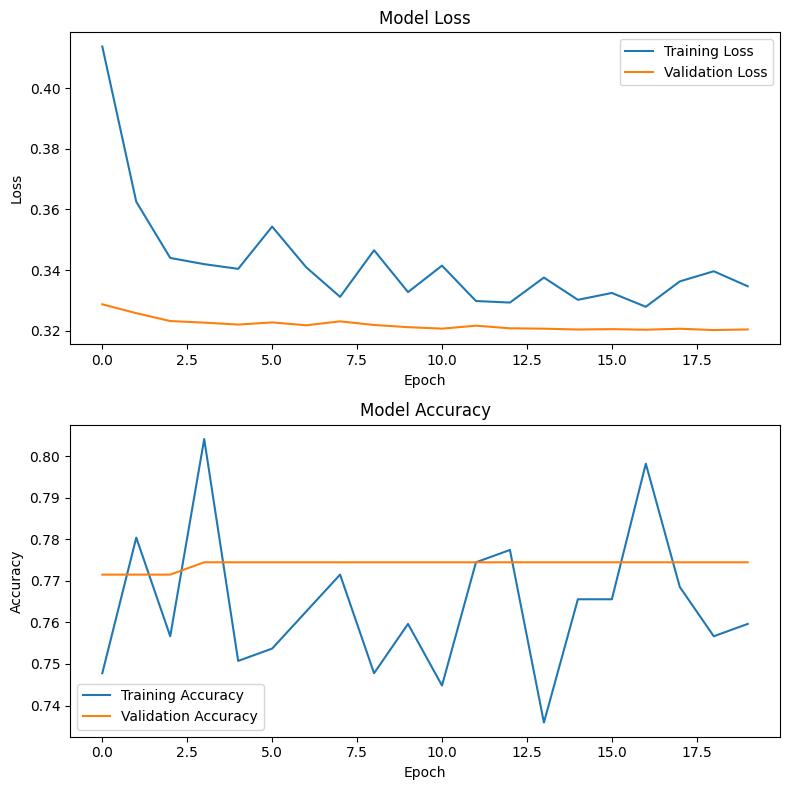

In [ ]:
# Plot the loss and accuracy curves for training and validation
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# ---- LOSS ----
ax[0].plot(history.history['loss'], label="Training Loss")
ax[0].plot(history.history['val_loss'], label="Validation Loss")
ax[0].set_title("Model Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

# ---- ACCURACY ----
ax[1].plot(history.history['accuracy'], label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], label="Validation Accuracy")
ax[1].set_title("Model Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
# create folder where the trained model can be stored later
import os
path = os.getcwd()
model_path = os.path.join(path, 'Trained_Model')

if not os.path.exists(model_path):
    os.makedirs(model_path)


In [ ]:
model_name = 'title_feature_model.h5'
model_path_new = os.path.join(model_path, model_name)

In [ ]:
# save full model for later reusage
model.save(model_path_new)
# load it later using "new_model = tf.keras.models.load_model(model_path_new)""

/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow_hub as hub


In [ ]:
# load pre-trained model
model_name = 'title_feature_model.h5'
model_path_new = os.path.join(model_path, model_name)
#loaded_model_text = tf.keras.models.load_model(model_path_new)
loaded_model = tf.keras.models.load_model(
     (model_path_new),
      custom_objects={
        'KerasLayer': hub.KerasLayer,
        'TFBertModel': TFBertModel
    })

In [ ]:
loaded_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 200)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 200)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 200, 7                                     

In [ ]:
print(val_encodings.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predicted probabilities
y_pred_probs = loaded_model.predict([
    val_encodings["input_ids"],
    val_encodings["attention_mask"]
])

# Convert probabilities to 0/1
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# True labels
y_true = val_labels.numpy().flatten()


11/11 [==============================] - 5s 434ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)


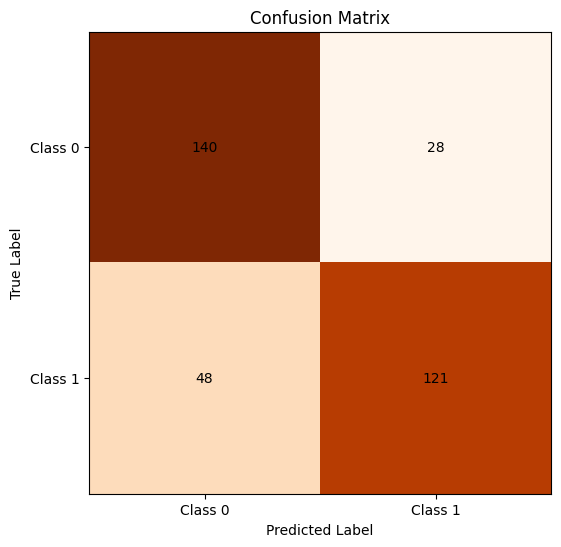

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

im = ax.imshow(cm,cmap='Oranges')

# Labels
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")

# Tick labels
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["Class 0", "Class 1"])
ax.set_yticklabels(["Class 0", "Class 1"])

# Add numbers inside cells
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.83      0.79       168
           1       0.81      0.72      0.76       169

    accuracy                           0.77       337
   macro avg       0.78      0.77      0.77       337
weighted avg       0.78      0.77      0.77       337



Normalized Confusion Matrix

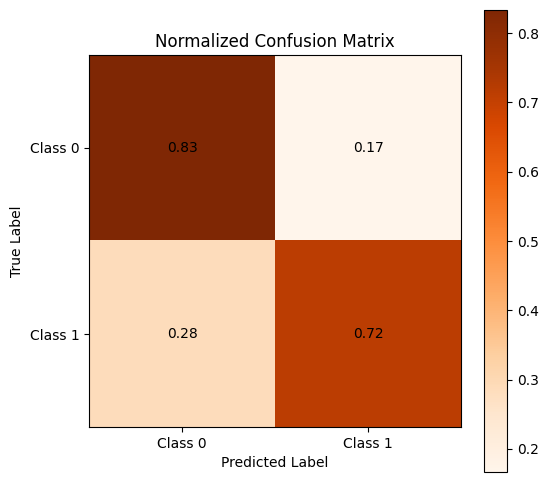

In [ ]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm_norm,cmap="Oranges")

ax.set_title("Normalized Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["Class 0", "Class 1"])
ax.set_yticklabels(["Class 0", "Class 1"])

for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, f"{cm_norm[i, j]:.2f}", ha="center", va="center")

plt.colorbar(im)
plt.show()


ROC Curve

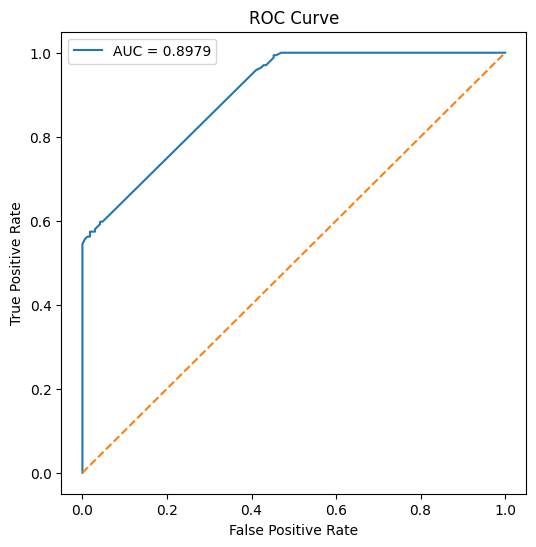

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
print("AUC Score:", roc_auc)


AUC Score: 0.8978585517047055


Precision-Recall Curve

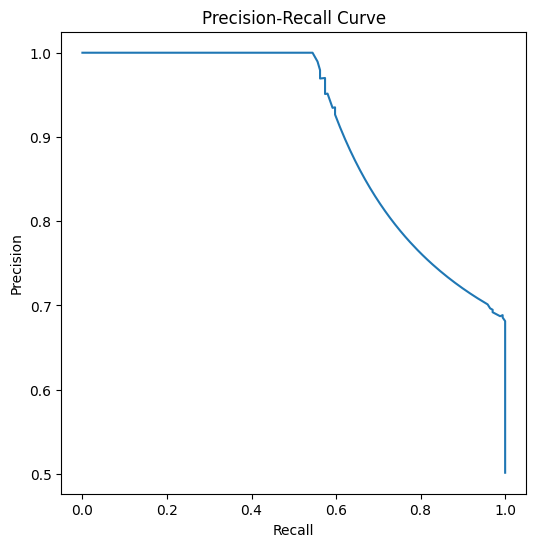

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_probs)

plt.figure(figsize=(6,6))
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.83      0.79       168
           1       0.81      0.72      0.76       169

    accuracy                           0.77       337
   macro avg       0.78      0.77      0.77       337
weighted avg       0.78      0.77      0.77       337

